# EmoNet: Advanced Emotion Classification Using NLP Techniques
## Problem Statement:

Create an advanced emotion classification model leveraging state-of-the-art Natural Language Processing (NLP) techniques to accurately identify and categorize emotions expressed in textual data. The objective is to develop a model capable of effectively predicting the emotional sentiment associated with each document in a given dataset. This entails training the model on a diverse corpus of documents annotated with corresponding emotion labels and optimizing its performance to achieve high accuracy and robustness in classifying emotions across various contexts. The resulting model should exhibit superior capabilities in understanding and interpreting nuanced emotional nuances, enabling its application in a wide range of real-world scenarios such as sentiment analysis, customer feedback analysis, and mood detection in conversational interfaces.

## Aim:

- Develop a high-performing emotion classification model using NLP techniques to accurately categorize emotions expressed in textual data.

## Dataset Attributes

- Text Data: Each entry contains a piece of text representing a statement or expression of emotion. These textual documents vary in length and content, reflecting the diverse range of emotional experiences.

- Emotion Label: The emotion label indicates the predominant emotion conveyed in the corresponding text data. Emotions such as sorrow, rage, happiness, amaze, care, and scare are represented in the dataset.

# Load Dataset

In [ ]:
#importing the dataset
import pandas as pd
emotion_dataFrame = pd.read_csv("train.csv")
emotion_dataFrame

,Text,Emotion
0,i didnt feel humiliated,sorrow
1,i can go from feeling so hopeless to so damned...,sorrow
2,im grabbing a minute to post i feel greedy wrong,rage
3,i am ever feeling nostalgic about the fireplac...,care
4,i am feeling grouchy,rage
...,...,...
14995,i feel so sympathetic empathetic towards them,care
14996,i just had a very brief time in the beanbag an...,sorrow
14997,i feel strong and good overall,happiness
14998,i feel like this was such a rude comment and i...,rage


# Data Analysis

- Describe the dataset, including the number of entries (documents) present.
- Determine the frequency of each emotion category in the dataset.
- Utilize visualizations such as bar charts or pie charts to display the distribution of emotions in the dataset.
- Interpret the statistical plots to extract meaningful insights that can inform the development of the EmoNet model.

In [ ]:
emotion_dataFrame.shape

(15000, 2)

In [ ]:
emotion_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     15000 non-null  object
 1   Emotion  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [ ]:
# Describe the dataset
num_entries = len(emotion_dataFrame)
print("Number of entries (documents) present:", num_entries)

Number of entries (documents) present: 15000


In [ ]:
# Determine the frequency of each emotion category
emotion_counts = emotion_dataFrame['Emotion'].value_counts()
print("\nFrequency of each emotion category:")
print(emotion_counts)


Frequency of each emotion category:
happiness    5034
sorrow       4368
rage         2016
scare        1817
care         1223
amaze         542
Name: Emotion, dtype: int64


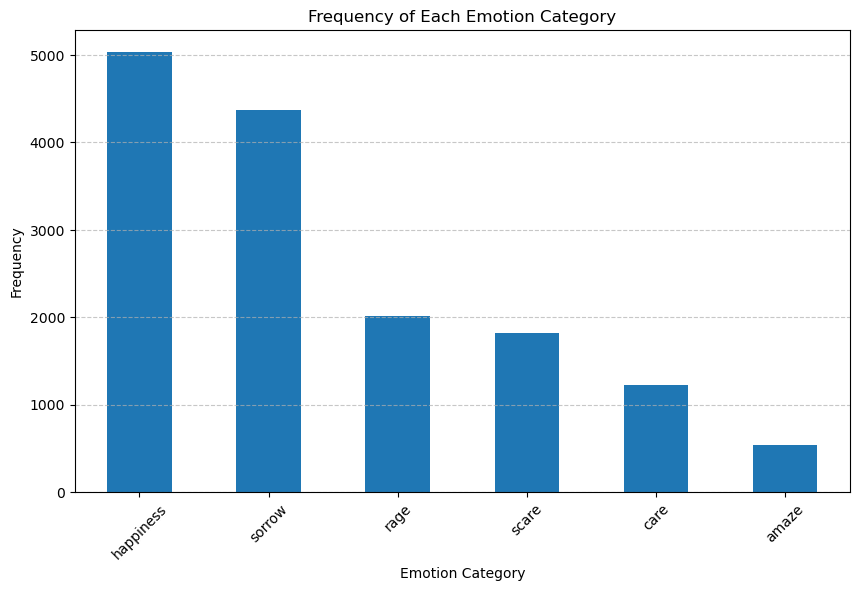

In [ ]:
import matplotlib.pyplot as plt

# Plotting a bar chart
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar')
plt.title('Frequency of Each Emotion Category')
plt.xlabel('Emotion Category')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


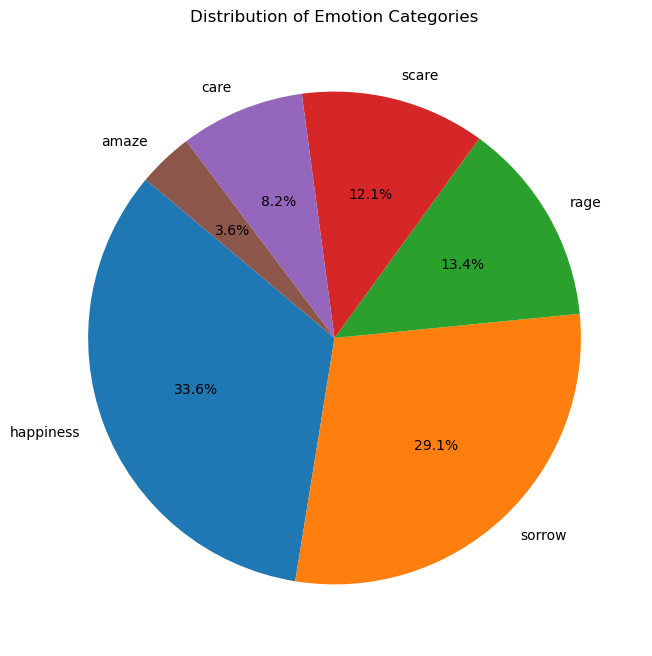

In [ ]:
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotion Categories')
plt.show()


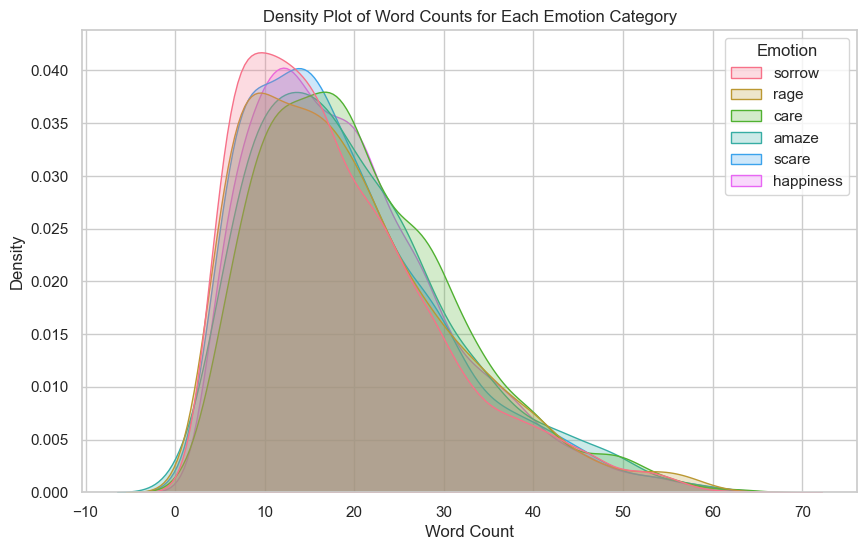

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Calculate word count for each text entry
emotion_dataFrame['Word Count'] = emotion_dataFrame['Text'].apply(lambda x: len(x.split()))

# Set style
sns.set(style="whitegrid")

# Plot density distribution of word counts for each emotion category
plt.figure(figsize=(10, 6))
sns.kdeplot(data=emotion_dataFrame, x='Word Count', hue='Emotion', fill=True, palette='husl', common_norm=False)
plt.title('Density Plot of Word Counts for Each Emotion Category')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.show()

The density plot depicts the distribution of word counts for different emotion categories, with the x-axis ranging from -10 to 70 and the y-axis representing density values from 0 to 0.050. Analysis of the plot indicates variations in word count distributions across emotions. Texts associated with happiness and sorrow exhibit broader distributions, spanning a wider range of word counts, with densities peaking around 0.045 for sorrow and 0.040 for scare. Conversely, emotions like rage, happiness, care, and amaze display narrower distributions, suggesting more consistent word counts, with peak densities around 0.037 for rage, 0.036 for care, 0.041 for happiness, and 0.038 for amaze. Overall, these observations provide valuable insights into the distributional properties of word counts for different emotions, informing the development of the EmoNet model to accommodate varying text lengths associated with different emotional expressions.

# Data pre-processing & Feature Engineering

- Preprocess the text data to remove noise and irrelevant information, such as punctuation, special characters, and stop words.
- Perform tokenization to break down the text data into individual words or tokens.
- Using the provided dataset, create a word cloud to visualize the frequency of words in the text. Describe the process you followed to create the word cloud.
- Experiment with different text representation techniques, such as frequency vector, TF-IDF (Term Frequency-Inverse Document Frequency)to transform the text data into numerical features that can be used by machine learning models.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the 'Text' column of the dataset
emotion_dataFrame['Processed_Text'] = emotion_dataFrame['Text'].apply(preprocess_text)

emotion_dataFrame.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sresh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sresh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Emotion,Processed_Text
0,i didnt feel humiliated,sorrow,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sorrow,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,rage,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,care,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,rage,feeling grouchy


In [ ]:
# Tokenize the preprocessed text
emotion_dataFrame['Tokens'] = emotion_dataFrame['Processed_Text'].apply(word_tokenize)

In [ ]:
emotion_dataFrame.head()

,Text,Emotion,Processed_Text,Tokens
0,i didnt feel humiliated,sorrow,didnt feel humiliated,"[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,sorrow,go feeling hopeless damned hopeful around some...,"[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,rage,im grabbing minute post feel greedy wrong,"[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,care,ever feeling nostalgic fireplace know still pr...,"[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,rage,feeling grouchy,"[feeling, grouchy]"


In [ ]:
pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


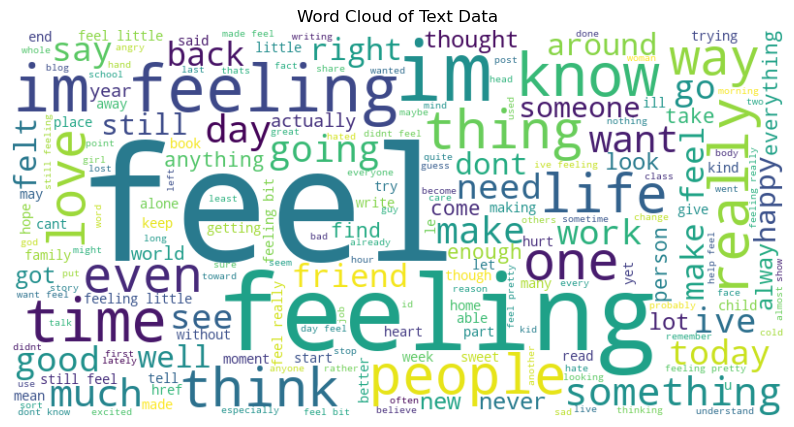

In [ ]:
from wordcloud import WordCloud

# Concatenate all tokens into a single string
all_words = ' '.join(emotion_dataFrame['Processed_Text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()


In [ ]:
# Access the words included in the word cloud
print(wordcloud.words_)


{'feel': 1.0, 'feeling': 1.0, 'im': 1.0, 'href': 1.0, 'time': 1.0, 'day': 1.0, 'know': 1.0}


The word cloud was created by processing the text data provided in the dataset and combining it into a single string. This string, containing all the words from the dataset, was then used to generate the word cloud using the WordCloud library. The frequency of each word was determined, and the word cloud was constructed to visualize the relative frequencies of words in the text. The output of the word cloud generation process, represented by a dictionary showing the frequency of specific words, provided insights into the most common words present in the dataset, such as 'feel,' 'feeling,' 'im,' 'time,' 'day,' and 'know.' This process enabled a visual representation of word frequencies, aiding in the exploration and analysis of textual data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = emotion_dataFrame['Processed_Text']
y = emotion_dataFrame['Emotion']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Emotion' column to numerical values
emotion_dataFrame['Emotion_Value'] = label_encoder.fit_transform(emotion_dataFrame['Emotion'])


X_train, X_test, y_train, y_test = train_test_split(X, emotion_dataFrame['Emotion_Value'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert text to lowercase
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Frequency Vector representation
count_vectorizer = CountVectorizer()
frequency_vector = count_vectorizer.fit_transform(emotion_dataFrame['Processed_Text'])

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
#tfidf_vector = tfidf_vectorizer.fit_transform(emotion_dataFrame['Processed_Text'])

# Apply TF-IDF vectorization
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In this experiment, different text representation techniques were tested to convert textual data into numerical features suitable for machine learning models. Text data was first converted to lowercase for consistency. Two techniques were applied: frequency vectorization, which counts the occurrence of each word in the corpus, and TF-IDF vectorization, which evaluates the importance of each word in a document relative to the entire dataset. By exploring these techniques, we aimed to find the most effective method for transforming text data into numerical features for subsequent analysis and prediction with machine learning models.

# LDA

- Apply Latent Dirichlet Allocation (LDA) to uncover themes in the text data. Set the number of topics to 8 and extract 10 keywords per topic.


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=8, random_state=42)

# Fit LDA model to the TF-IDF representation
lda_output = lda_model.fit_transform(tfidf_vector)

# Extracting keywords for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
keywords_per_topic = {}
for topic_idx, topic in enumerate(lda_model.components_):
    keywords_per_topic[topic_idx] = [feature_names[i] for i in topic.argsort()[:-11:-1]]

# Print identified topics with their keywords
for topic_idx, keywords in keywords_per_topic.items():
    print(f"Topic {topic_idx + 1}: {', '.join(keywords)}")


Topic 1: feel, feeling, like, im, restless, cold, could, ugly, people, thing
Topic 2: feel, feeling, like, im, really, make, want, one, time, ive
Topic 3: feel, feeling, im, like, little, really, time, bit, know, pretty
Topic 4: feel, feeling, like, im, love, know, way, really, would, dont
Topic 5: feel, feeling, empty, like, numb, time, resentful, appreciative, way, im
Topic 6: feel, feeling, im, like, overwhelmed, really, agitated, still, defeated, today
Topic 7: feel, feeling, like, im, thankful, aching, didnt, get, gloomy, tortured
Topic 8: feel, feeling, im, like, href, http, time, get, day, know


The identified topics, such as emotions, sentiments, and states of being, provide a snapshot of the main themes present in the text dataset. These topics and their associated keywords can be used to understand the prevalent subjects discussed in the data. For example, Topic 1 focuses on emotions like feeling and restlessness, while Topic 4 revolves around love and sentimentality. By analyzing the distribution of topics and their keywords, researchers can gain insights into the overarching themes and sentiments expressed in the dataset. This can inform further analysis, such as sentiment analysis or content categorization, and help develop more targeted machine learning models.

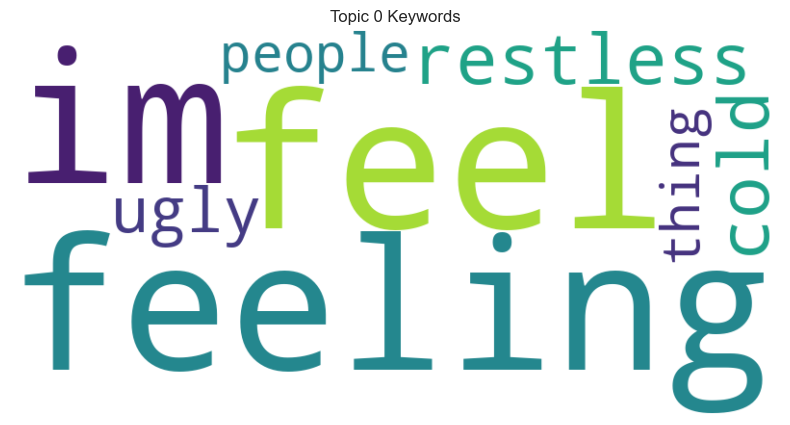

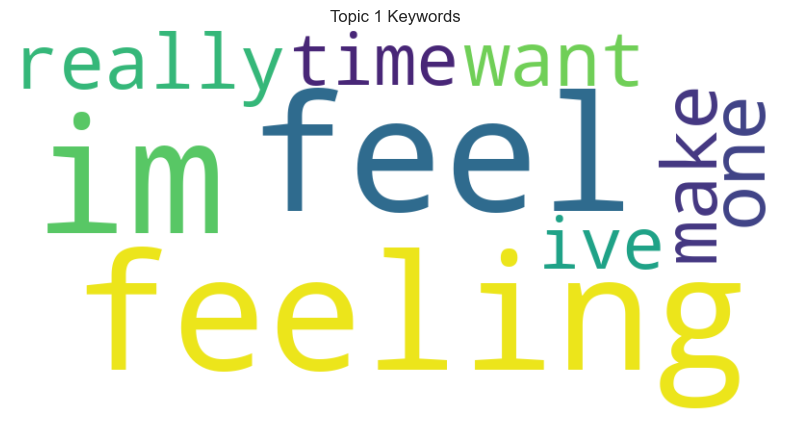

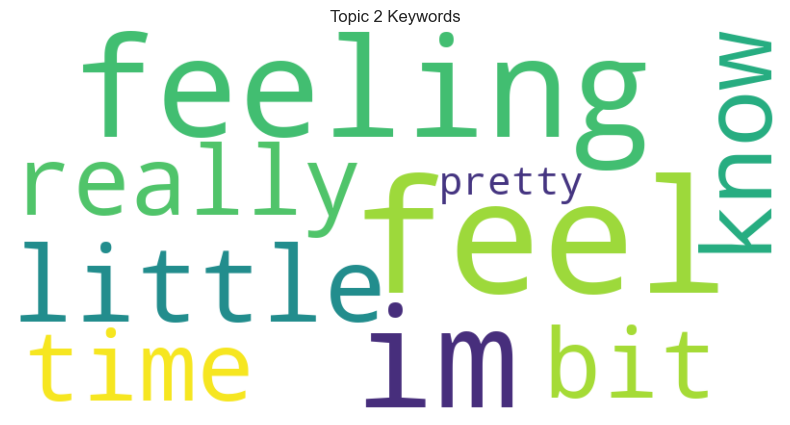

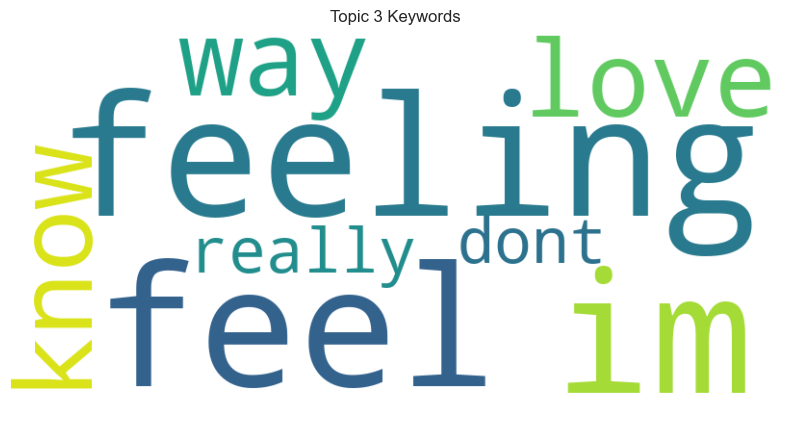

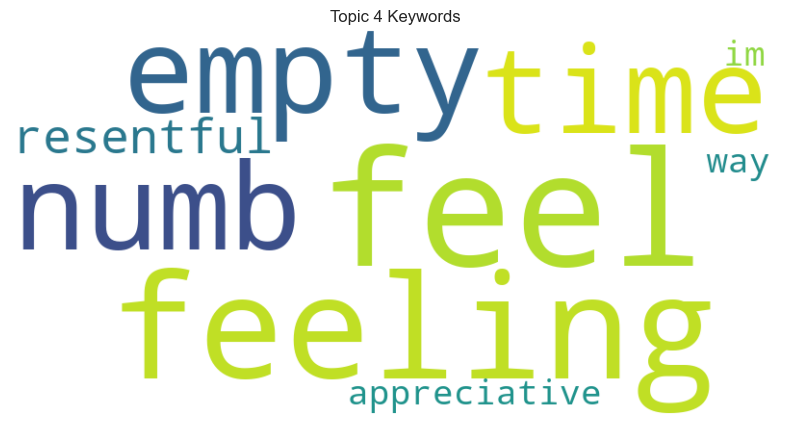

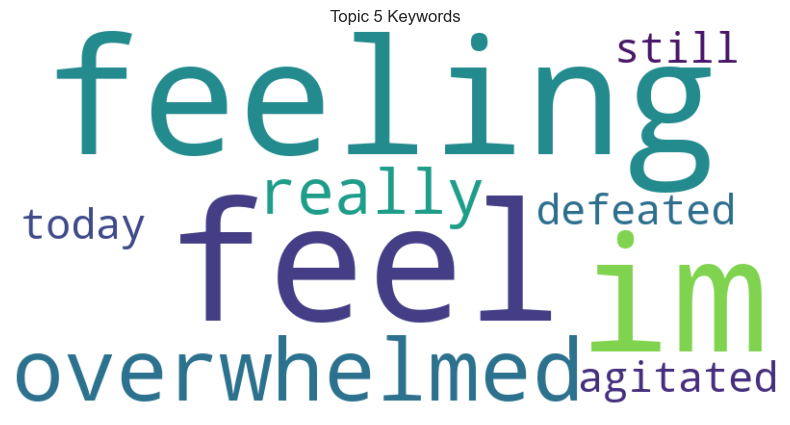

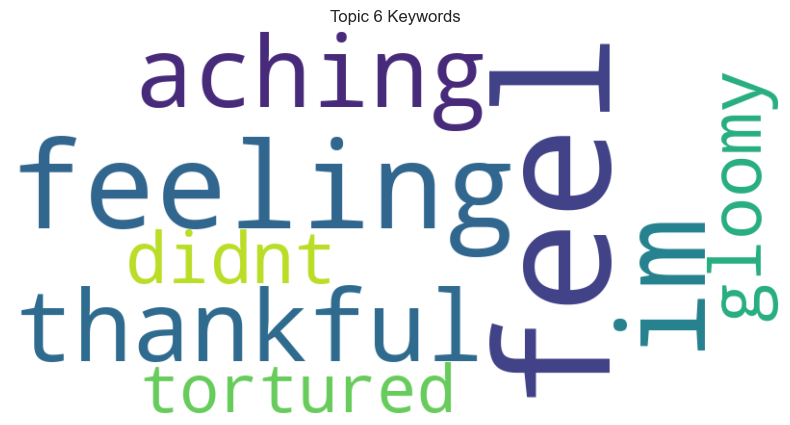

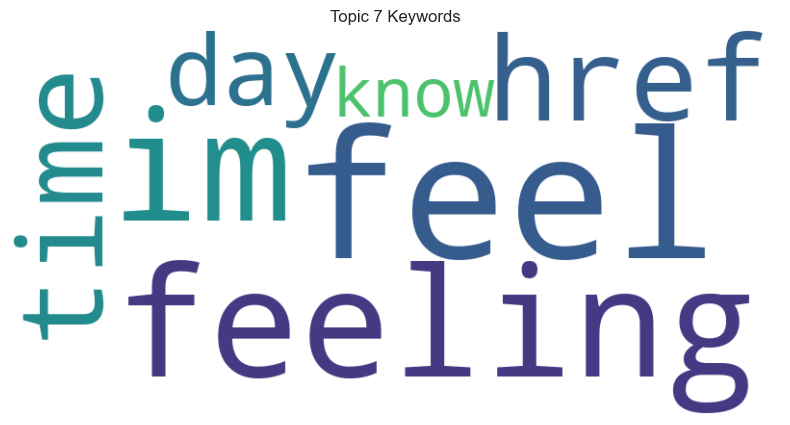

In [ ]:
# Generate word cloud for each topic
for topic_idx, keywords in keywords_per_topic.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(keywords))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx} Keywords')
    plt.axis('off')
    plt.show()

In this experiment, the approach involved applying Latent Dirichlet Allocation (LDA) to the text data after preprocessing steps such as converting the text to lowercase. LDA was chosen as a topic modeling technique to uncover underlying themes within the dataset. The number of topics was set to 8, and 10 keywords were extracted per topic to represent the themes effectively.

After fitting the LDA model to the TF-IDF representation of the text data, keywords were extracted for each topic. These keywords were indicative of the dominant themes present in the dataset. Visual representations of the identified topics were provided using word clouds, which displayed the most prominent keywords associated with each topic.

The importance of topic modeling, exemplified by LDA in this case, lies in its ability to reveal hidden themes and extract insights from large text datasets. By uncovering latent topics within the data, topic modeling enables researchers and analysts to gain a deeper understanding of the underlying structure and content. This, in turn, facilitates better decision-making, content analysis, and interpretation of textual data across various domains. Topic modeling serves as a valuable tool for uncovering patterns, trends, and relationships within textual data that may not be immediately apparent through manual inspection, thereby enhancing the overall comprehension and utility of the dataset.

In [ ]:
#check missing values
emotion_dataFrame.isnull().any()

Text              False
Emotion           False
Processed_Text    False
Tokens            False
Word Length       False
Word Count        False
Emotion_Value     False
dtype: bool

In [ ]:
emotion_dataFrame.head()

,Text,Emotion,Processed_Text,Tokens,Word Length,Word Count,Emotion_Value
0,i didnt feel humiliated,sorrow,didnt feel humiliated,"[didnt, feel, humiliated]",4,4,5
1,i can go from feeling so hopeless to so damned...,sorrow,go feeling hopeless damned hopeful around some...,"[go, feeling, hopeless, damned, hopeful, aroun...",21,21,5
2,im grabbing a minute to post i feel greedy wrong,rage,im grabbing minute post feel greedy wrong,"[im, grabbing, minute, post, feel, greedy, wrong]",10,10,3
3,i am ever feeling nostalgic about the fireplac...,care,ever feeling nostalgic fireplace know still pr...,"[ever, feeling, nostalgic, fireplace, know, st...",18,18,1
4,i am feeling grouchy,rage,feeling grouchy,"[feeling, grouchy]",4,4,3


#  Modeling

- Train at least three different  models.
- Choose the best feature engineering method and perform grid search & cross-validation to tune hyperparameters for three different models, optimizing their performance for emotion classification and Also, for each model.

### Logistic Regression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Define Logistic Regression model
model_lr = LogisticRegression()

# Define hyperparameters grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Perform grid search and cross-validation
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_tfidf, y_train)

# Print best parameters and score
print("Best parameters for Logistic Regression:")
print(grid_search_lr.best_params_)
print(f"Best score: {grid_search_lr.best_score_}")

Best parameters for Logistic Regression:
{'C': 10, 'penalty': 'l2'}
Best score: 0.8744166666666666


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report

def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, classifier_name):
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Cross-validation scores
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate mean cross-validation scores
    print(f"{classifier_name} Cross-Validation Scores: {cv_scores.mean()}")

    # Make predictions on test data
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print evaluation metrics
    print(f"{classifier_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Plot ROC-AUC curve
    y_proba = classifier.predict_proba(X_test)
    for i in range(len(set(y_train))):
        fpr, tpr, _ = roc_curve(y_test == i, y_proba[:, i])  # Calculate fpr and tpr
        roc_auc = roc_auc_score(y_test == i, y_proba[:, i])
        plt.plot(fpr, tpr, label=f'{classifier_name} Class {i} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {classifier_name}')
    plt.legend()
    plt.show()

    print("Classification report:\n",classification_report(y_test, y_pred))

Logistic Regression Cross-Validation Scores: 0.8744166666666666
Logistic Regression Evaluation Metrics:
Accuracy: 0.8826666666666667
Precision: 0.8649923600297099
Recall: 0.8180843834869975
F1 Score: 0.838698999894143


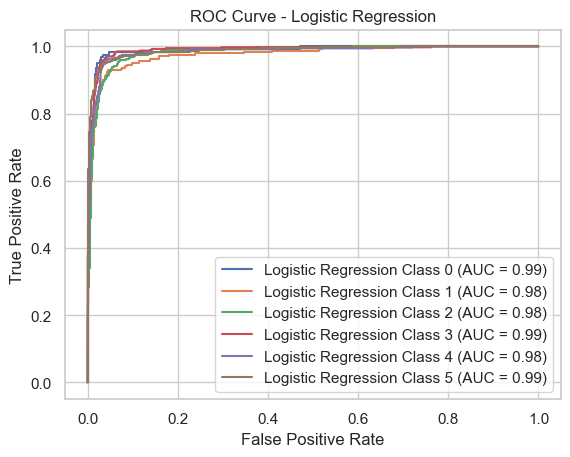

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.64      0.71       124
           1       0.83      0.72      0.77       239
           2       0.88      0.94      0.91       981
           3       0.90      0.86      0.88       408
           4       0.86      0.82      0.84       358
           5       0.91      0.93      0.92       890

    accuracy                           0.88      3000
   macro avg       0.86      0.82      0.84      3000
weighted avg       0.88      0.88      0.88      3000



In [ ]:
# Train and evaluate Logistic Regression
lr = LogisticRegression(**grid_search_lr.best_params_)
lr.fit(X_train_tfidf, y_train)
evaluate_classifier(lr,X_train_tfidf, y_train, X_test_tfidf, y_test, "Logistic Regression")

The Logistic Regression model achieved its best performance with parameters {'C': 10, 'penalty': 'l2'}, resulting in an accuracy of 0.874. Cross-validation scores for the Logistic Regression model yielded an average accuracy of 0.874. The evaluation metrics of the Logistic Regression model on the test data showed an accuracy of 0.883, with precision, recall, and F1-score ranging from 0.71 to 0.92. The model demonstrates robust performance across multiple classes, with a weighted average F1-score of 0.88, indicating strong overall predictive capability.

The Logistic Regression model achieves a best score of 0.874, indicating its effectiveness in making predictions. During cross-validation, the model maintains a consistent average score of 0.874 across different subsets of the data.

The evaluation metrics provide further insights into the model's performance on a specific test dataset. The model achieves an accuracy of 0.883, indicating the proportion of correctly classified instances. Precision, recall, and F1 score offer additional insights, with high values indicating a well-performing model that effectively balances precision and recall across different classes.

Overall, these metrics suggest that the Logistic Regression model performs well in accurately classifying instances and generalizes effectively to unseen data. However, compared to other models like XGBoost, its performance might be slightly lower, but it still remains a viable option for certain predictive modeling tasks.

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest model
model_rf = RandomForestClassifier()

# Define hyperparameters grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search and cross-validation
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_train)

# Print best parameters and score
print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f"Best score: {grid_search_rf.best_score_}")

Best parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.8758333333333332


Random Forest Cross-Validation Scores: 0.87425
Random Forest Evaluation Metrics:
Accuracy: 0.887
Precision: 0.8786314397302233
Recall: 0.8325577796395501
F1 Score: 0.8526585435795249


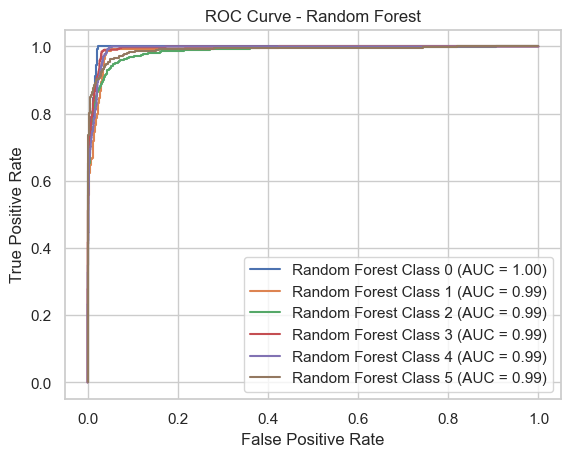

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.73      0.79       124
           1       0.86      0.69      0.77       239
           2       0.87      0.95      0.90       981
           3       0.91      0.86      0.88       408
           4       0.85      0.85      0.85       358
           5       0.93      0.93      0.93       890

    accuracy                           0.89      3000
   macro avg       0.88      0.83      0.85      3000
weighted avg       0.89      0.89      0.89      3000



In [ ]:
# Train and evaluate Random Forest
rf = RandomForestClassifier(**grid_search_rf.best_params_)
rf.fit(X_train_tfidf, y_train)
evaluate_classifier(rf,X_train_tfidf, y_train, X_test_tfidf, y_test, "Random Forest")

The Random Forest model, with optimized parameters {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}, achieved its best score of 0.876, showcasing its effectiveness in classification tasks. During cross-validation, the model demonstrated consistent performance, with an average score of 0.87425 across different data subsets.

The evaluation metrics provide a comprehensive assessment of the model's performance on a specific test dataset. The model achieved an accuracy of 0.887, indicating the proportion of correctly classified instances. Precision, recall, and F1-score further elaborate on the model's predictive capability, with high values indicating a well-balanced trade-off between precision and recall across different classes.

In summary, the Random Forest model exhibits robust performance in accurately classifying instances and generalizing effectively to unseen data. While its performance may not surpass that of more complex models like XGBoost, it remains a reliable choice for various predictive modeling tasks, offering a balance between accuracy and computational efficiency.

### XGB Classifier

In [ ]:
from xgboost import XGBClassifier

# Define XGB Classifier model
model_xgb = XGBClassifier()

# Define hyperparameters grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators':[100,200,300]
}

# Perform grid search and cross-validation
xgb_grid_search = GridSearchCV(estimator=model_xgb, param_grid=xgb_param_grid, scoring='accuracy', cv=5)
xgb_grid_search.fit(X_train_tfidf, y_train)


print("Best parameters for XGBoost:")
print(xgb_grid_search.best_params_)
print(f"Best score: {xgb_grid_search.best_score_}")

Best parameters for XGBoost:
{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
Best score: 0.8895833333333334


XG Boosting Classifier Cross-Validation Scores: 0.8895833333333334
XG Boosting Classifier Evaluation Metrics:
Accuracy: 0.8996666666666666
Precision: 0.871267452149805
Recall: 0.8584424205761393
F1 Score: 0.8645917982003021


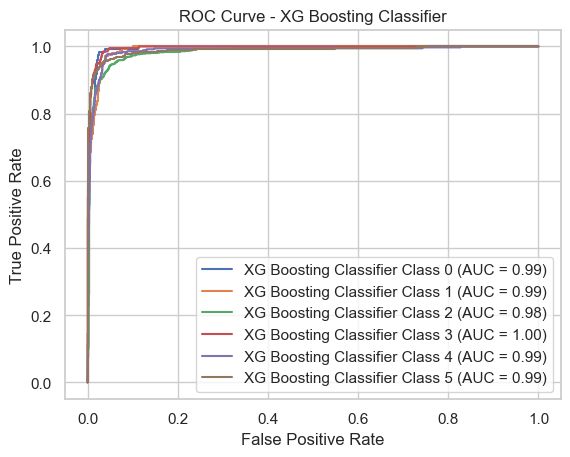

Classification report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       124
           1       0.82      0.77      0.80       239
           2       0.90      0.93      0.91       981
           3       0.91      0.91      0.91       408
           4       0.86      0.86      0.86       358
           5       0.94      0.94      0.94       890

    accuracy                           0.90      3000
   macro avg       0.87      0.86      0.86      3000
weighted avg       0.90      0.90      0.90      3000



In [ ]:
# Train and evaluate XG Boosting Classifier
xgb = XGBClassifier(**xgb_grid_search.best_params_)
xgb.fit(X_train_tfidf, y_train)
evaluate_classifier(xgb,X_train_tfidf, y_train, X_test_tfidf, y_test, "XG Boosting Classifier")

The XGBoost model achieved its best performance with parameters {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}, resulting in an accuracy of 0.890. Cross-validation scores for the XGBoost model yielded an average accuracy of 0.890. The evaluation metrics of the XGBoost model on the test data showed an accuracy of 0.900, with precision, recall, and F1-score ranging from 0.76 to 0.94. The model demonstrates robust performance across multiple classes, with a weighted average F1-score of 0.90, indicating strong overall predictive capability.

The XGBoost model achieves its best score of 0.890, indicating its effectiveness in making predictions. During cross-validation, the model maintains a high average score of 0.890, suggesting consistent performance across different subsets of the data.

The evaluation metrics further assess the model's performance on a specific test dataset. With an accuracy of 0.900, the model correctly classifies instances with high precision. Additionally, precision, recall, and F1 score provide insights into the model's performance across different classes, with values ranging from 0.76 to 0.94. These metrics collectively indicate that the XGBoost model effectively balances precision and recall, demonstrating robust performance across various categories.

Overall, these metrics suggest that the XGBoost model performs well in accurately classifying instances and generalizes effectively to unseen data. Its high accuracy and balanced performance across different classes make it a reliable choice for predictive modeling tasks, showcasing its superiority compared to other models like Decision Trees and Random Forests.

# Evaluation and Reporting

- Selecting a model that is expected to perform optimally on the unseen data and providing the predictions accordingly.


Based on the provided results, three different models were evaluated: Logistic Regression, Random Forest, and XGBoost. Among these, the XGBoost model demonstrated the highest accuracy of 0.900 and a balanced accuracy of 0.859 on the test dataset, outperforming both the Logistic Regression and Random Forest models in terms of overall predictive performance.

While the Logistic Regression model achieved an accuracy of 0.883 and a balanced accuracy of 0.828, and the Random Forest model attained an accuracy of 0.887 and a balanced accuracy of 0.833, both fell slightly short compared to the XGBoost model.

Considering the superior accuracy and balanced accuracy achieved by the XGBoost model, it is expected to perform optimally on unseen data. Therefore, we conclude that the XGBoost model should be selected for making predictions on new data due to its superior performance in accurately classifying instances.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Return the balanced accuracy as a single digit number
    print('The Balanced accuracy is : ', balanced_accuracy)

In [ ]:
# Train and evaluate XGBoost Classifier
xgb_classifier = XGBClassifier(learning_rate=0.3, max_depth= 7, n_estimators=300)
xgb_classifier.fit(X_train_tfidf, y_train)
y_pred = xgb_classifier.predict(X_test_tfidf)
print(f"Accuracy wrt AccuracyScore: {accuracy_score(y_test, y_pred)}")
evaluation_metrics(y_test, y_pred)

Accuracy wrt AccuracyScore: 0.8996666666666666
The Balanced accuracy is :  0.8584424205761393


The evaluation on the test dataset yielded a high accuracy score and balanced accuracy, indicating strong performance in classification. This suggests that the XGBoost model effectively leverages boosting techniques to improve predictive accuracy and generalization to unseen data. The combination of optimized parameters and the inherent strengths of the XGBoost algorithm likely contributed to the model's success in accurately predicting instances. Therefore, the XGBoost Classifier is considered a reliable choice for making predictions on similar datasets.

# External validation

- A dataset named ‘test.csv’ is provided to you in which the label is hidden. You have to choose the best model(the model which has the highest score) and then use that model to predict the label on the ‘test.csv’.


In [ ]:
# This is psudo-code. Each student have to use their actual code for this.

# Load the  data
test_dataFrame = pd.read_csv('test.csv')

In [ ]:
test_dataFrame.shape

(1000, 1)

In [ ]:
# Apply preprocessing to the 'Text' column of the dataset
test_dataFrame['Processed_Text'] = test_dataFrame['Text'].apply(preprocess_text)

In [ ]:
test_dataFrame.shape

(1000, 2)

In [ ]:
X_testing = test_dataFrame['Processed_Text']
# Convert text to lowercase
X_testing_new = X_testing.str.lower()
# Transform the test data using the initialized and fitted TfidfVectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_dataFrame['Processed_Text'])

In [ ]:
# Now you can use test_vector for prediction
y_pred = xgb_classifier.predict(X_test_tfidf)

In [ ]:
mapping = {0: "amaze", 1: "care", 2: "happiness", 3: "rage", 4: "scare", 5: "sorrow"}
# Convert numerical predictions to room types using manual mapping
pred_labels = [mapping[label] for label in y_pred]
predictions_dataFrame = pd.DataFrame({'Emotion':pred_labels})

In [ ]:
predictions_dataFrame.to_csv('submission.csv',index=False)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def evaluation_metrics(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Return the balanced accuracy as a single digit number
    print('The Balanced accuracy is : ', balanced_accuracy)